In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Loading the dataset
DataSet = pd.read_csv(r"DG_preprocessing.csv")
DataSet

,label,full_text,digit
0,False,abortion says annies list political group supp...,0
1,True,energy history job accomplishments decline coa...,1
2,True,foreign policy hillary clinton agrees john mcc...,1
3,True,education chicago bears starting quarterbacks ...,1
4,True,ethics m person stage worked actively just las...,1
...,...,...,...
54032,True,brussels reuters nato allies tuesday welcomed ...,1
54033,True,london reuters lexisnexis provider legal regul...,1
54034,True,minsk reuters shadow disused sovietera factori...,1
54035,True,moscow reuters vatican secretary state cardina...,1


#### Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54037 entries, 0 to 54036
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      54037 non-null  bool  
 1   full_text  54037 non-null  object
 2   digit      54037 non-null  int64 
dtypes: bool(1), int64(1), object(1)
memory usage: 897.2+ KB


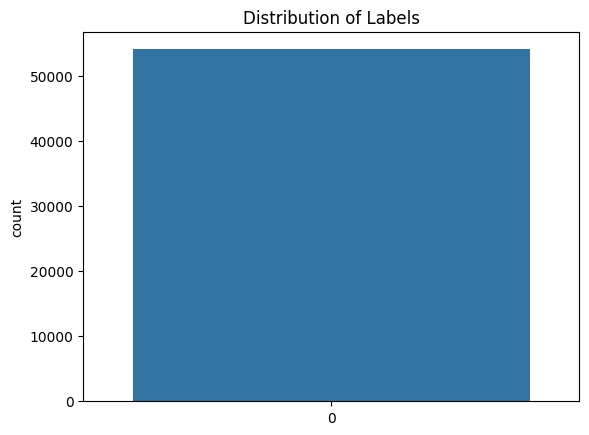

In [4]:
DataSet.head()
DataSet.info()
DataSet.describe()

#Checking the distribution of the target variable
sns.countplot(DataSet['digit'])
plt.title('Distribution of Labels')
plt.show()

#### Data Cleaning and Preprocessing

In [5]:
#Filling missing values, if any
DataSet = DataSet.fillna('')
DataSet

,label,full_text,digit
0,False,abortion says annies list political group supp...,0
1,True,energy history job accomplishments decline coa...,1
2,True,foreign policy hillary clinton agrees john mcc...,1
3,True,education chicago bears starting quarterbacks ...,1
4,True,ethics m person stage worked actively just las...,1
...,...,...,...
54032,True,brussels reuters nato allies tuesday welcomed ...,1
54033,True,london reuters lexisnexis provider legal regul...,1
54034,True,minsk reuters shadow disused sovietera factori...,1
54035,True,moscow reuters vatican secretary state cardina...,1


In [8]:
LabelEncoder = LabelEncoder()
DataSet['label'] = LabelEncoder.fit_transform(DataSet['label'])

In [10]:
X = DataSet['full_text']
Y = DataSet['label']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Feature Extraction

In [11]:
#Performing text vectorization
Vectorizer = TfidfVectorizer()
X_Train = Vectorizer.fit_transform(X_Train)
X_Test = Vectorizer.transform(X_Test)

#### Model Training and Evaluation

In [12]:
#Creating and training the Linear Regression model
LRModel = LinearRegression()
LRModel.fit(X_Train, Y_Train)

LinearRegression()

In [14]:
#Making predictions on the testing set
Y_Pred = LRModel.predict(X_Test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Splitting the dataset into train and test sets
X = DataSet['full_text']
Y = DataSet['label']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2, random_state=42)

LRModel = LogisticRegression()
LRModel.fit(X_Train, Y_Train)

Y_Pred = LRModel.predict(X_Test)

print("Classification Report:")
report = classification_report(Y_Test, Y_Pred, target_names=['fake', 'real'])
print(report)

accuracy = accuracy_score(Y_Test, Y_Pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate confusion matrix
confusion_mat = confusion_matrix(Y_Test, Y_Pred)
print("Confusion Matrix:")
print(confusion_mat)


In [15]:
#Evaluating the model
MSE = mean_squared_error(Y_Test, Y_Pred)
R2 = r2_score(Y_Test, Y_Pred)

print("Mean Squared Error:", MSE)
print("R-squared:", R2)

Mean Squared Error: 5.241656383501708
R-squared: -19.976627122737913


In [16]:
#Saving the trained model for future use
joblib.dump(LRModel, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

#### Bar Plot: Visualize the distribution of sentiments in the dataset

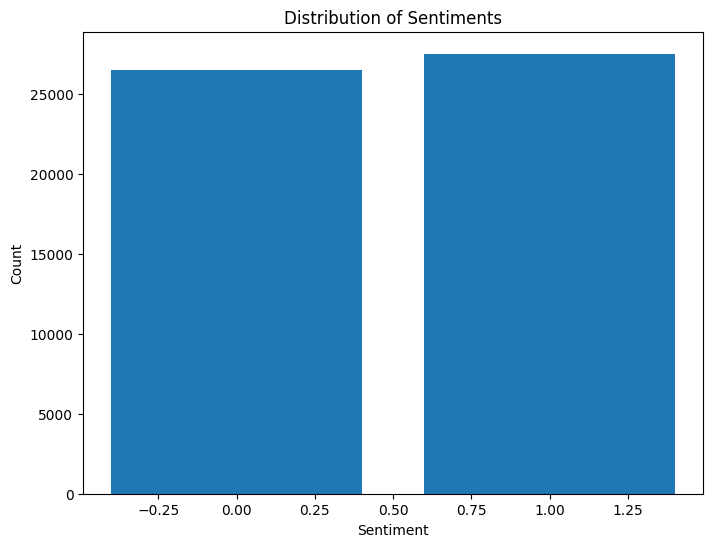

In [18]:
SentimentCounts = DataSet['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(SentimentCounts.index, SentimentCounts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

#### Pie Chart: Show the proportion of each sentiment category in the dataset

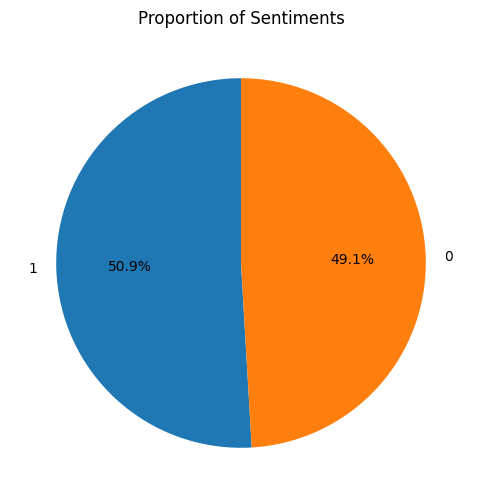

In [21]:
#Counting the number of occurrences for each sentiment
SentimentCounts = DataSet['label'].value_counts()

#Creating a pie chart
plt.figure(figsize=(8, 6))
plt.pie(SentimentCounts.values, labels=SentimentCounts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Sentiments')
plt.show()

#### Residual Plot: Comparison between actual values and predicted values

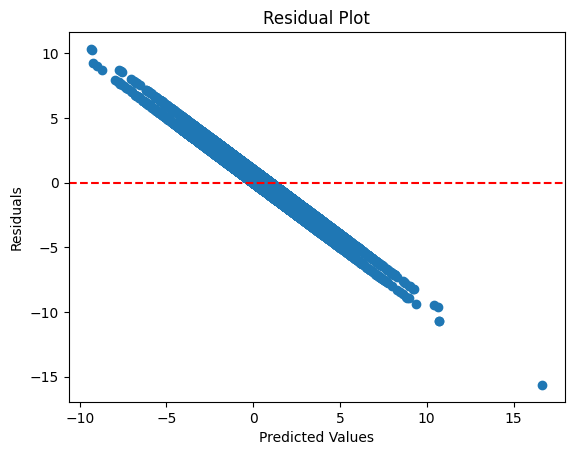

In [22]:
residuals = Y_Test - Y_Pred
plt.scatter(Y_Pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()